In [4]:
import requests

In [5]:
resp_pabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_PAPUA_BARAT.json')
print(resp_pabar)

<Response [200]>


In [6]:
cov_pabar_raw = resp_pabar.json()

In [7]:
print('Nama-nama elemen utama:\n', cov_pabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Papua Barat : %d' %cov_pabar_raw['kasus_total'])
print('Presentase kematian akibat COVID-19 di Papua Barat : %f.2%%' %cov_pabar_raw['meninggal_persen'])
print('Presentase tingkat kesembuhan dari COVID-19 di Papua Barat : %f.2%%' %cov_pabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Papua Barat : 7699
Presentase kematian akibat COVID-19 di Papua Barat : 1.649565.2%
Presentase tingkat kesembuhan dari COVID-19 di Papua Barat : 90.297441.2%


In [9]:
import numpy as np
import pandas as pd
cov_pabar = pd.DataFrame(cov_pabar_raw['list_perkembangan'])
print('Info cov_pabar:\n', cov_pabar.info())
print('\nLima data teratas cov_pabar:\n', cov_pabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       348 non-null    int64
 1   KASUS                         348 non-null    int64
 2   MENINGGAL                     348 non-null    int64
 3   SEMBUH                        348 non-null    int64
 4   DIRAWAT_OR_ISOLASI            348 non-null    int64
 5   AKUMULASI_KASUS               348 non-null    int64
 6   AKUMULASI_SEMBUH              348 non-null    int64
 7   AKUMULASI_MENINGGAL           348 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  348 non-null    int64
dtypes: int64(9)
memory usage: 24.6 KB
Info cov_pabar:
 None

Lima data teratas cov_pabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1585267200000      2          0       0                   2   
1  1585353600000      0          0       0   

In [11]:
cov_pabar_tidy = (cov_pabar.drop(columns=[item for item in cov_pabar.columns if item.startswith('AKUMULASI')
                                         or item.startswith('DIRAWAT')])
                 .rename(columns=str.lower)
                 .rename(columns={'kasus':'kasus_baru'})
                 )
cov_pabar_tidy['tanggal'] = pd.to_datetime(cov_pabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_pabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-27           2          0       0
1 2020-03-28           0          0       0
2 2020-03-29           0          0       0
3 2020-03-30           0          0       0
4 2020-03-31           0          0       0


<Figure size 432x288 with 0 Axes>

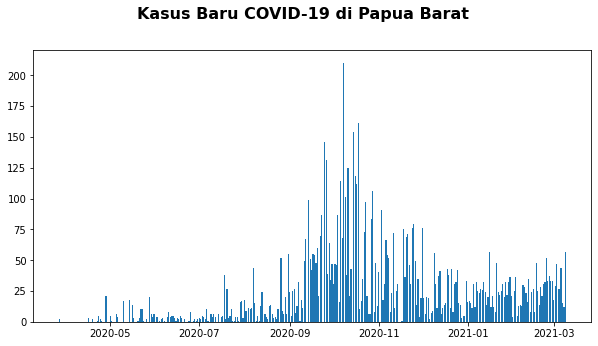

In [13]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_pabar_tidy, x='tanggal', height='kasus_baru')
fig.suptitle('Kasus Baru COVID-19 di Papua Barat', y=1.00, fontsize=16, fontweight='bold', ha='center')
plt.show()

<Figure size 432x288 with 0 Axes>

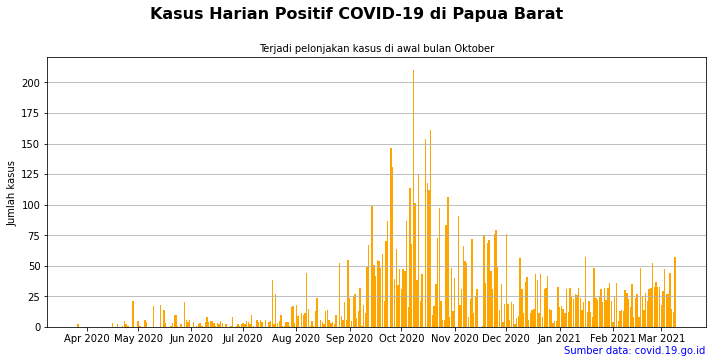

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_pabar_tidy, x='tanggal', height='kasus_baru', color='orange')
fig.suptitle('Kasus Harian Positif COVID-19 di Papua Barat', y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Oktober', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1,'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

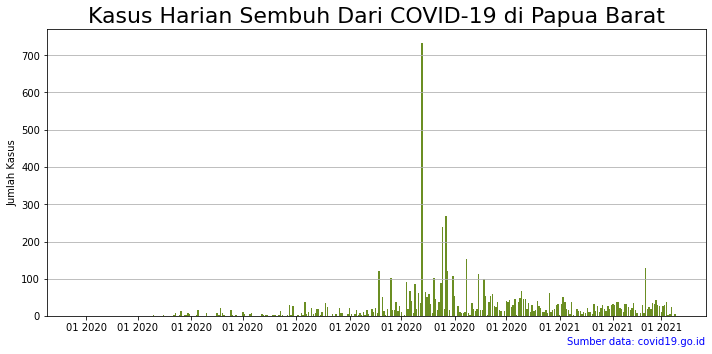

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_pabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Papua Barat', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1,-0.1, 'Sumber data: covid19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

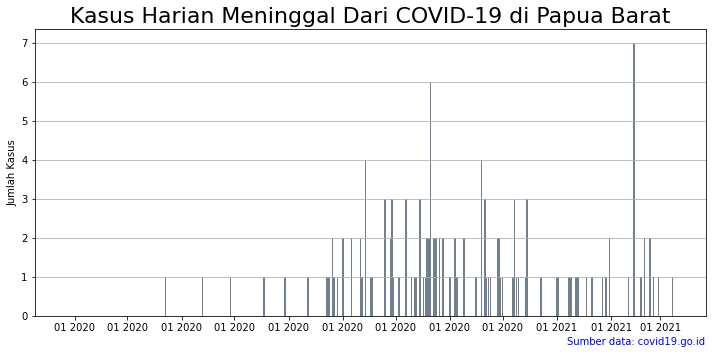

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_pabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Papua Barat', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1,-0.1, 'Sumber data: covid19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
cov_pabar_pekanan = (cov_pabar_tidy.set_index('tanggal')['kasus_baru']
                    .resample('W')
                    .sum()
                    .reset_index()
                    .rename(columns={'kasus_baru':'jumlah'}))

cov_pabar_pekanan['tahun'] = cov_pabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_pabar_pekanan['pekan_ke'] = cov_pabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_pabar_pekanan = cov_pabar_pekanan[['tahun','pekan_ke','jumlah']]

print('Info cov_pabar_pekanan:')
print(cov_pabar_pekanan.info())
print('\nLima data teratas cov_pabar_pekanan:\n', cov_pabar_pekanan.head())

Info cov_pabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     51 non-null     int64
 1   pekan_ke  51 non-null     int64
 2   jumlah    51 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB
None

Lima data teratas cov_pabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        13       2
1   2020        14       0
2   2020        15       0
3   2020        16       5
4   2020        17       9


In [22]:
cov_pabar_pekanan['jumlah_pekanlalu'] = cov_pabar_pekanan['jumlah'].shift().replace(np.nan,0).astype(np.int)
cov_pabar_pekanan['lebih_baik'] = cov_pabar_pekanan['jumlah'] < cov_pabar_pekanan['jumlah_pekanlalu']
print('Sepuluh data teratas:\n'), cov_pabar_pekanan.head(10)

Sepuluh data teratas:



<ipython-input-22-009b543a5b01>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cov_pabar_pekanan['jumlah_pekanlalu'] = cov_pabar_pekanan['jumlah'].shift().replace(np.nan,0).astype(np.int)


(None,
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
 0   2020        13       2                 0       False
 1   2020        14       0                 2        True
 2   2020        15       0                 0       False
 3   2020        16       5                 0       False
 4   2020        17       9                 5       False
 5   2020        18      27                 9       False
 6   2020        19      27                27       False
 7   2020        20      35                27       False
 8   2020        21      25                35        True
 9   2020        22      38                25       False)

<Figure size 432x288 with 0 Axes>

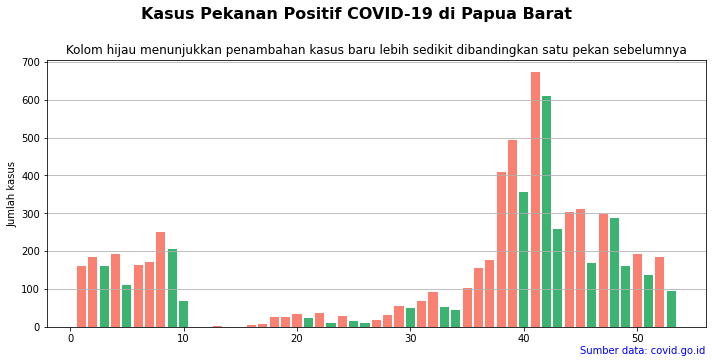

In [23]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data = cov_pabar_pekanan, x='pekan_ke', height='jumlah', 
       color=['mediumseagreen' if x is True else 'salmon' for x in cov_pabar_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Papua Barat', y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1,-0.1,'Sumber data: covid.go.id', color='blue', ha='right', transform=ax.transAxes)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [25]:
cov_pabar_akumulasi = cov_pabar_tidy[['tanggal']].copy()
cov_pabar_akumulasi['akumulasi_aktif'] = (cov_pabar_tidy['kasus_baru'] - cov_pabar_tidy['sembuh'] - cov_pabar_tidy['meninggal']).cumsum()
cov_pabar_akumulasi['akumulasi_sembuh'] = cov_pabar_tidy['sembuh'].cumsum()
cov_pabar_akumulasi['akumulasi_meninggal'] = cov_pabar_tidy['meninggal'].cumsum()
cov_pabar_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
343,2021-03-05,531,6915,125
344,2021-03-06,569,6921,125
345,2021-03-07,559,6946,125
346,2021-03-08,569,6947,126
347,2021-03-09,621,6952,126


<Figure size 432x288 with 0 Axes>

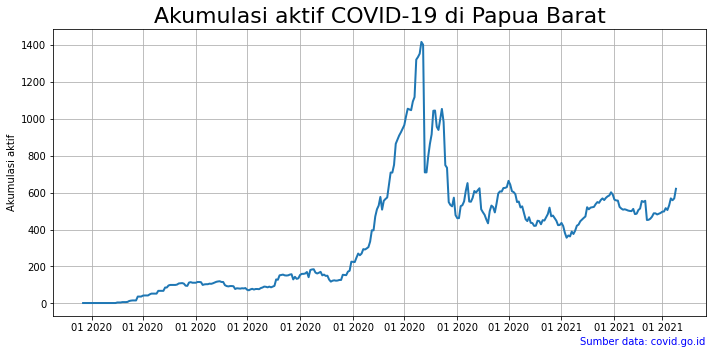

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data = cov_pabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Papua Barat', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

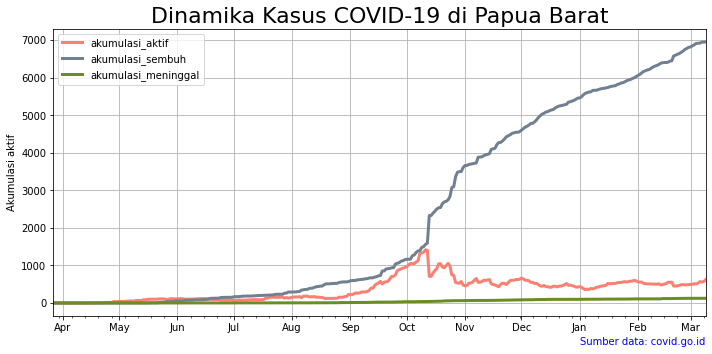

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_pabar_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, color=['salmon','slategrey','olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Papua Barat', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()